In [1]:
import requests
import pandas as pd
import re
import bs4
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
df=pd.read_csv('costofliving.csv')

In [3]:
df.head()

,Unnamed: 0,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
0,Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,...,1900000.0,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
1,Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,...,1338500.0,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
2,Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,...,1642625.0,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
3,Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,...,1050000.0,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
4,Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,...,1621000.0,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75


In [4]:
df.set_index('Unnamed: 0',inplace=True)
# index 0,1,2 formed as cities like agartala ,agra

In [5]:
df.head()

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,25.00,...,1900000.0,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,20.83,...,1338500.0,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,21.10,...,1642625.0,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,43.33,...,1050000.0,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,18.30,...,1621000.0,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75


In [6]:
df.keys()

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

# MealforPeopleMidrangeRestaurantThreecourse and waterliterbottle

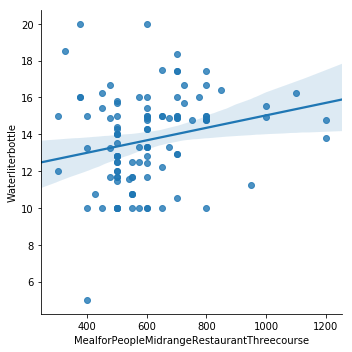

In [7]:
sns.lmplot(x='MealforPeopleMidrangeRestaurantThreecourse',y='Waterliterbottle',data=df)

In [8]:
df.head()

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,25.00,...,1900000.0,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
Agra,500.0,110.0,147.50,12.83,30.83,62.00,243.33,100.41,71.00,20.83,...,1338500.0,0.40,500.00,340000.00,2900.00,1537.50,3625.00,7250.00,27303.26,11.07
Ahmedabad,675.0,150.0,102.38,14.88,35.91,66.33,275.45,121.67,65.00,21.10,...,1642625.0,0.69,497.88,102607.14,2474.07,2343.33,8092.14,17258.14,29399.75,9.27
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,43.33,...,1050000.0,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
Ajmer-India,650.0,100.0,91.67,15.00,25.00,61.33,240.00,117.00,36.67,18.30,...,1621000.0,0.53,225.00,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75


In [9]:
# Meal and Waterbottle
# 1. Highest cities meal cost vs bottle cost
# 2. Highest bottle cost vs meal cost

df1 = df.copy()

# High cost meals and Low cost  meals comparing with water bottle

==========High cost meals=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Delhi,1200.0,132.5,125.49,14.75,30.06,65.78,260.90,127.38,58.54,22.14,...,1662509.40,0.84,470.42,134763.44,2766.88,3051.35,9843.75,22638.95,70246.94,9.36
Mumbai,1200.0,180.0,150.26,13.78,29.98,66.50,271.30,160.74,82.22,25.21,...,1618459.69,0.79,789.67,166084.34,2460.14,3080.15,19367.82,46350.65,187957.72,9.25
Goa,1100.0,80.0,120.00,16.25,33.33,61.00,280.00,160.00,106.67,20.00,...,1566875.00,0.93,360.00,76000.00,2433.33,2914.09,8033.90,19111.11,41875.00,10.56
Bangalore,1000.0,150.0,123.79,15.55,35.62,63.67,242.27,163.95,70.37,26.83,...,1764355.95,0.80,419.00,179377.68,2412.48,2759.11,9965.69,25644.93,52923.73,9.53
Gurgaon,1000.0,130.0,119.44,14.96,29.30,78.33,265.48,148.48,73.33,22.21,...,1727222.22,0.76,561.90,196538.46,2851.85,3353.12,9910.71,26937.50,74548.73,9.29


========= Compare High cost meals and Water bottle ========== 


,MealforPeopleMidrangeRestaurantThreecourse,Waterliterbottle
Unnamed: 0,,
Delhi,1200.0,14.75
Mumbai,1200.0,13.78
Goa,1100.0,16.25
Bangalore,1000.0,15.55
Gurgaon,1000.0,14.96


================== Low cost meals ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Davanagere-Davangere-India,300.0,107.5,90.0,12.0,25.00,54.50,185.00,167.50,42.50,20.00,...,NaN,NaN,NaN,150000.00,1500.00,2500.00,3000.00,14000.0,19375.04,NaN
Aizawl-India,300.0,85.0,75.0,15.0,26.67,73.33,266.67,140.00,80.00,43.33,...,1050000.00,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.0,NaN,5.00
Malappuram-India,325.0,287.5,50.0,18.5,NaN,NaN,150.00,100.00,80.00,45.00,...,1033333.33,0.80,200.00,100000.00,1200.00,2500.00,6000.00,10000.0,18000.00,NaN
Kottayam-India,375.0,100.0,81.0,16.0,31.39,60.00,175.00,126.57,63.33,31.00,...,1600000.00,0.94,533.33,115833.33,1750.00,2339.09,7500.00,15100.0,36836.84,9.83
Ernakulam,375.0,120.0,150.0,20.0,25.00,53.33,290.00,150.00,46.67,26.67,...,1685125.00,0.97,500.00,117500.00,2142.86,2625.00,7357.14,15000.0,132558.10,9.94


================ Low cost meals vs Water bottle ===========


,MealforPeopleMidrangeRestaurantThreecourse,Waterliterbottle
Unnamed: 0,,
Davanagere-Davangere-India,300.0,12.0
Aizawl-India,300.0,15.0
Malappuram-India,325.0,18.5
Kottayam-India,375.0,16.0
Ernakulam,375.0,20.0


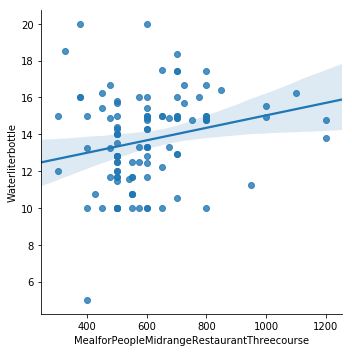

In [10]:
# High meals
high_meal = df1.sort_values('MealforPeopleMidrangeRestaurantThreecourse',ascending=False)
print("==========High cost meals=======")
high_meal.head()


# High meals vs Water bottle
high_mealandwater = high_meal[['MealforPeopleMidrangeRestaurantThreecourse','Waterliterbottle']]
print("========= Compare High cost meals and Water bottle ========== ")
high_mealandwater.head()

# Low mals
low_meal = df1.sort_values('MealforPeopleMidrangeRestaurantThreecourse',ascending=True)
print("================== Low cost meals ===============")
low_meal.head()

# Low meals vs Water bottle
low_mealandwater = low_meal[['MealforPeopleMidrangeRestaurantThreecourse','Waterliterbottle']]
print("================ Low cost meals vs Water bottle ===========")
low_mealandwater.head()


#sns.lmplot(x='MealforPeopleMidrangeRestaurantThreecourse',y='Waterliterbottle',data=high_mealandwater)

Text(0.5, 1.0, 'High cost  meals vs Water bottle')

Text(0.5, 1.0, 'Low cost meals vs Water bottle')

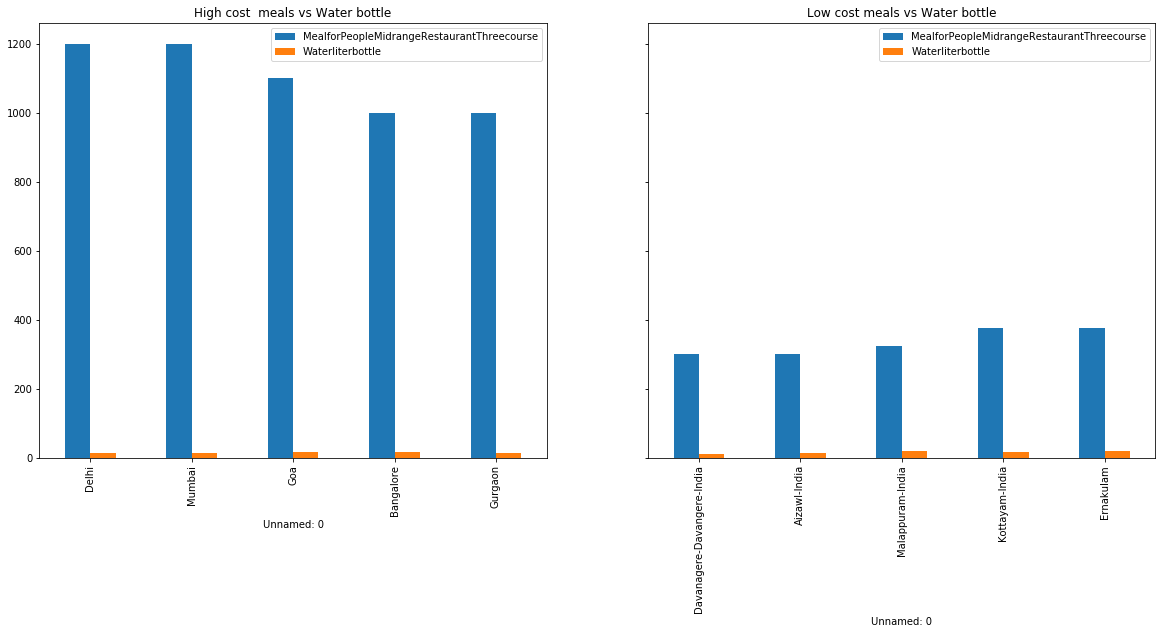

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost  meals vs Water bottle")
high_mealandwater.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost meals vs Water bottle")
low_mealandwater.head().plot(kind='bar',ax=ax2)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

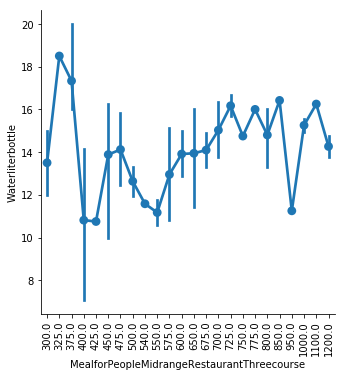

In [73]:
sns.catplot(x="MealforPeopleMidrangeRestaurantThreecourse", y="Waterliterbottle", data=df1,kind='point')
plt.xticks(rotation='vertical')

# High cost Water bottle and Low cost Water bottle comparing with Meals

In [12]:
# High water bottle
high_water = df1.sort_values('Waterliterbottle',ascending=False)
print("==========High cost water bottle=======")
high_water.head()


# High Water bottle vs meals
high_waterandmeal= high_water[['Waterliterbottle','MealforPeopleMidrangeRestaurantThreecourse']]
print("========= Compare High cost water vs meals========== ")
high_waterandmeal.head()

# Low water bottle
low_water = df1.sort_values('Waterliterbottle',ascending=True)
print("================== Low cost water bottle ===============")
low_water.head()

# Low Water bottle vs meals
low_waterandmeal = low_water[['Waterliterbottle','MealforPeopleMidrangeRestaurantThreecourse']]
print("================ Comparing Low cost Water bottle vs meals===========")
low_waterandmeal.head()

==========High cost water bottle=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Haridwar-India,600.0,150.0,100.00,20.00,40.0,60.00,250.0,80.00,70.00,25.00,...,NaN,0.75,NaN,200000.0,1500.00,1000.0,5000.00,9000.0,21527.82,NaN
Ernakulam,375.0,120.0,150.00,20.00,25.0,53.33,290.0,150.00,46.67,26.67,...,1685125.00,0.97,500.0,117500.0,2142.86,2625.0,7357.14,15000.0,132558.10,9.94
Malappuram-India,325.0,287.5,50.00,18.50,NaN,NaN,150.0,100.00,80.00,45.00,...,1033333.33,0.80,200.0,100000.0,1200.00,2500.0,6000.00,10000.0,18000.00,NaN
Aurangabad,700.0,155.0,132.71,18.33,39.6,60.00,200.0,131.67,63.33,25.00,...,1470800.00,0.73,500.0,122500.0,2100.00,1900.0,5700.00,11000.0,29861.15,8.70
Dimapur-India,650.0,75.0,85.00,17.50,27.5,150.00,200.0,180.00,150.00,40.00,...,NaN,1.00,500.0,NaN,1500.00,2000.0,NaN,5000.0,NaN,NaN


========= Compare High cost water vs meals========== 


,Waterliterbottle,MealforPeopleMidrangeRestaurantThreecourse
Unnamed: 0,,
Haridwar-India,20.00,600.0
Ernakulam,20.00,375.0
Malappuram-India,18.50,325.0
Aurangabad,18.33,700.0
Dimapur-India,17.50,650.0


================== Low cost water bottle ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Nalgonda-India,400.0,75.0,NaN,5.0,34.53,54.33,135.00,125.00,59.50,22.0,...,900000.0,1.00,NaN,NaN,NaN,600.00,2500.00,6000.00,16145.87,11.00
Agartala-India,550.0,100.0,109.67,10.0,33.33,77.00,226.67,118.00,53.33,25.0,...,1900000.0,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
Muzaffarpur-India,500.0,100.0,70.00,10.0,20.00,68.00,158.33,106.67,57.50,21.0,...,1627000.0,0.80,NaN,68666.67,2287.50,2362.38,4500.00,10000.00,NaN,9.61
Moradabad-India,800.0,115.0,73.33,10.0,30.00,64.00,304.44,80.00,47.50,17.5,...,1500000.0,1.03,350.00,80000.00,1566.67,2166.67,4833.33,10333.33,163518.81,8.67
Jorhat-India,600.0,90.0,50.00,10.0,22.50,60.00,250.00,182.50,145.00,17.5,...,1600000.0,0.95,500.00,NaN,1250.00,2500.00,2250.00,4750.00,33000.00,9.00


================ Comparing Low cost Water bottle vs meals===========


,Waterliterbottle,MealforPeopleMidrangeRestaurantThreecourse
Unnamed: 0,,
Nalgonda-India,5.0,400.0
Agartala-India,10.0,550.0
Muzaffarpur-India,10.0,500.0
Moradabad-India,10.0,800.0
Jorhat-India,10.0,600.0


Text(0.5, 1.0, 'High cost Water bottle Vs meals')

Text(0.5, 1.0, 'Low cost Water bottle Vs meals')

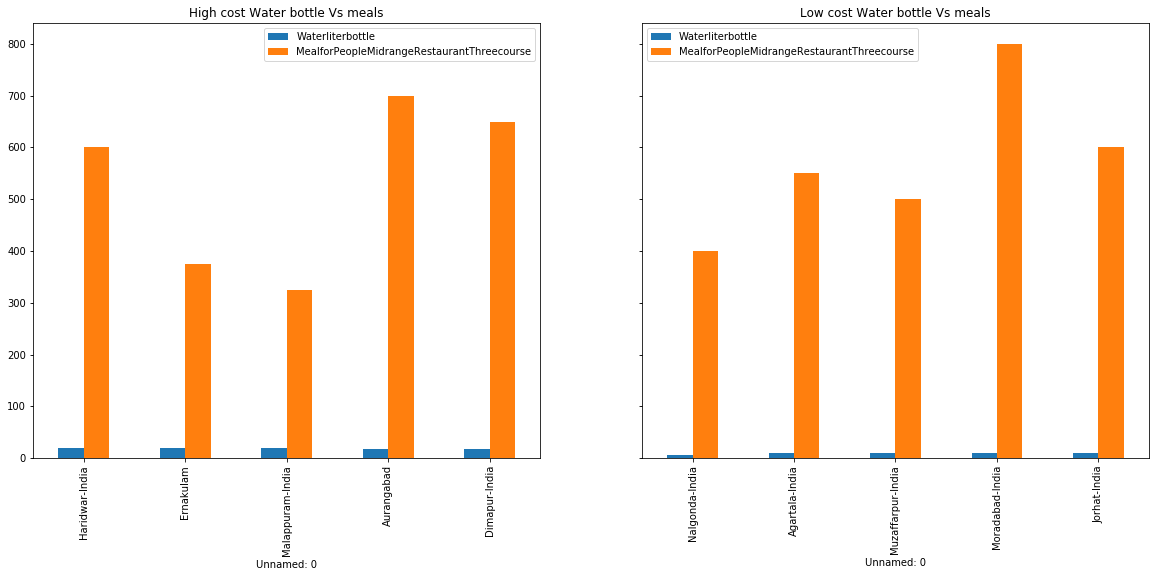

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Water bottle Vs meals")
high_waterandmeal.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Water bottle Vs meals")
low_waterandmeal.head().plot(kind='bar',ax=ax2)
plt.show()

# Apples and Oranges

# High cost Apples and Low cost  Apples Comparing with Oranges

In [14]:
df1['Oranges1kg'].describe()

count    108.000000
mean      64.848704
std       18.867998
min       20.000000
25%       57.500000
50%       60.000000
75%       72.000000
max      150.000000
Name: Oranges1kg, dtype: float64

In [15]:
df1['Oranges1kg'].fillna(df1['Oranges1kg'].mean(),inplace=True)

In [16]:
df1['Oranges1kg'].isnull().any()

False

In [17]:
# High apples

high_apples = df1.sort_values('Apples1kg',ascending=False)
print("==========High cost Apples=======")
high_apples.head()


# High apples  vs oranges
high_applesandoranges= high_apples[['Apples1kg','Oranges1kg']]
print("========= Comparing  High Apples cost  vs Oranges========== ")
high_applesandoranges.head()

# Low apples
low_apples = df1.sort_values('Apples1kg',ascending=True)
print("================== Low Apples cost ===============")
low_apples.head()

# Low apples vs oranges
low_applesandoranges = low_apples[['Apples1kg','Oranges1kg']]
print("================ Comparing Low  Apples cost vs Oranges===========")
low_applesandoranges.head()

==========High cost Apples=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gangtok-Sikkim-India,600.0,80.0,85.0,15.0,30.00,72.00,200.00,215.00,20.0,30.00,...,NaN,NaN,NaN,NaN,1500.00,3333.33,3166.67,8666.67,32291.73,7.00
Kurnool-India,700.0,100.0,60.0,15.0,31.33,57.33,210.00,186.67,37.5,25.00,...,2300000.0,1.10,450.0,185000.0,1666.67,2000.00,4833.33,10500.00,33906.32,10.33
Jorhat-India,600.0,90.0,50.0,10.0,22.50,60.00,250.00,182.50,145.0,17.50,...,1600000.0,0.95,500.0,NaN,1250.00,2500.00,2250.00,4750.00,33000.00,9.00
Imphal-India,650.0,90.0,65.0,10.0,27.50,120.00,246.67,180.00,145.0,25.75,...,1600000.0,0.95,NaN,NaN,1500.00,2000.00,1750.00,6000.00,30218.80,9.00
Dimapur-India,650.0,75.0,85.0,17.5,27.50,150.00,200.00,180.00,150.0,40.00,...,NaN,1.00,500.0,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN


========= Comparing  High Apples cost  vs Oranges========== 


,Apples1kg,Oranges1kg
Unnamed: 0,,
Gangtok-Sikkim-India,215.00,20.0
Kurnool-India,186.67,37.5
Jorhat-India,182.50,145.0
Imphal-India,180.00,145.0
Dimapur-India,180.00,150.0


================== Low Apples cost ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Kanpur,575.0,120.0,106.67,16.00,35.00,62.13,187.0,74.0,40.000000,16.17,...,1663500.0,0.89,533.33,87666.67,2439.80,1868.75,4666.67,11444.44,36273.18,8.80
Bilaspur-India,725.0,150.0,90.00,15.67,28.33,56.67,200.0,80.0,60.000000,20.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,6000.00,55690.00,NaN
Durgapur-India,550.0,80.0,324.00,12.50,35.00,64.00,210.0,80.0,64.848704,17.00,...,NaN,NaN,NaN,96000.00,NaN,2350.00,6666.67,13000.00,16038.23,9.00
Bikaner-India,450.0,90.0,82.50,10.00,21.67,62.50,275.0,80.0,36.670000,15.00,...,1060000.0,0.98,450.00,125000.00,3666.67,2750.00,3500.00,9500.00,39027.82,9.67
Haridwar-India,600.0,150.0,100.00,20.00,40.00,60.00,250.0,80.0,70.000000,25.00,...,NaN,0.75,NaN,200000.00,1500.00,1000.00,5000.00,9000.00,21527.82,NaN


================ Comparing Low  Apples cost vs Oranges===========


,Apples1kg,Oranges1kg
Unnamed: 0,,
Kanpur,74.0,40.000000
Bilaspur-India,80.0,60.000000
Durgapur-India,80.0,64.848704
Bikaner-India,80.0,36.670000
Haridwar-India,80.0,70.000000


Text(0.5, 1.0, 'High cost Apples  Vs Oranges')

Text(0.5, 1.0, 'Low cost Apples Vs Oranges')

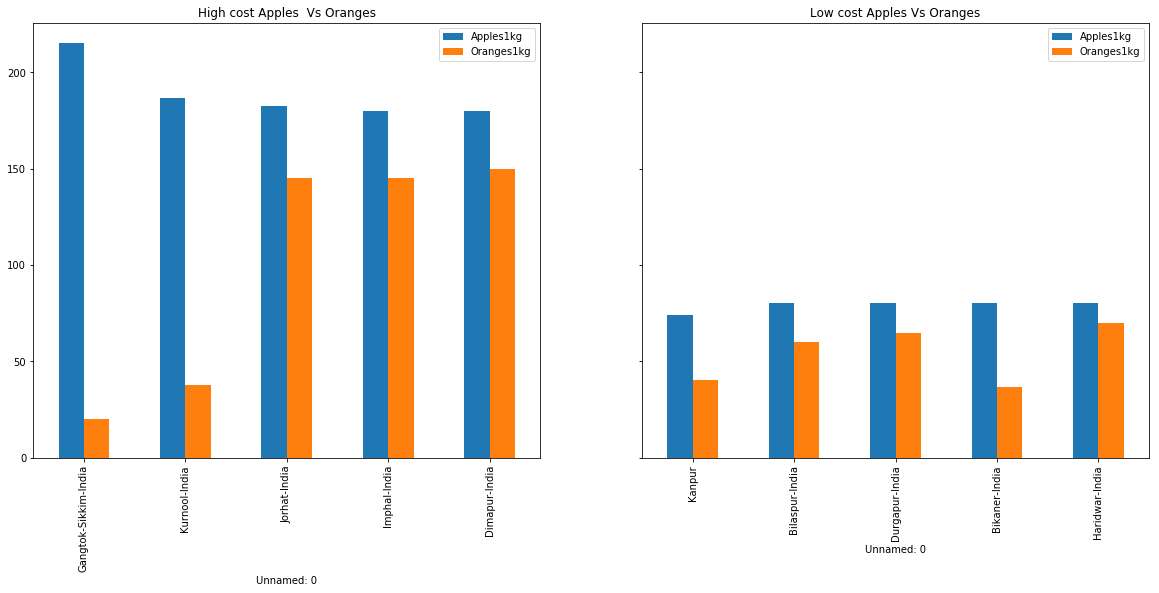

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Apples  Vs Oranges")
high_applesandoranges.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Apples Vs Oranges")
low_applesandoranges.head().plot(kind='bar',ax=ax2)
plt.show()

# High cost Oranges and Low cost Oranges comparing with Apples

In [19]:
# high oranges
high_oranges = df1.sort_values('Oranges1kg',ascending=False)
print("==========High cost Oranges=======")
high_oranges.head()

# high oranges vs apples
high_orangesandapples= high_oranges[['Oranges1kg','Apples1kg']]
print("========= Comparing  High Oranges cost  vs Apples========== ")
high_orangesandapples.head()

#low oranges                                     
low_oranges = df1.sort_values('Oranges1kg',ascending=True)
print("================== Low Oranges cost ===============")
low_oranges.head()

#low oranges vs apples
low_orangesandapples = low_oranges[['Oranges1kg','Apples1kg']]
print("================ Comparing Low Oranges Vs  Apples ===========")
low_orangesandapples.head()

==========High cost Oranges=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Dimapur-India,650.0,75.0,85.00,17.50,27.50,150.0,200.00,180.0,150.00,40.00,...,NaN,1.00,500.0,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN
Jorhat-India,600.0,90.0,50.00,10.00,22.50,60.0,250.00,182.5,145.00,17.50,...,1600000.00,0.95,500.0,NaN,1250.00,2500.00,2250.00,4750.00,33000.00,9.00
Imphal-India,650.0,90.0,65.00,10.00,27.50,120.0,246.67,180.0,145.00,25.75,...,1600000.00,0.95,NaN,NaN,1500.00,2000.00,1750.00,6000.00,30218.80,9.00
Goa,1100.0,80.0,120.00,16.25,33.33,61.0,280.00,160.0,106.67,20.00,...,1566875.00,0.93,360.0,76000.00,2433.33,2914.09,8033.90,19111.11,41875.00,10.56
Kalyan,700.0,165.0,127.22,12.91,29.98,66.5,212.50,142.5,82.22,24.94,...,1618459.69,0.73,861.0,120909.09,2100.00,2485.00,7416.67,14666.67,64583.46,9.34


========= Comparing  High Oranges cost  vs Apples========== 


,Oranges1kg,Apples1kg
Unnamed: 0,,
Dimapur-India,150.00,180.0
Jorhat-India,145.00,182.5
Imphal-India,145.00,180.0
Goa,106.67,160.0
Kalyan,82.22,142.5


================== Low Oranges cost ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gangtok-Sikkim-India,600.0,80.0,85.00,15.0,30.00,72.00,200.0,215.00,20.00,30.0,...,NaN,NaN,NaN,NaN,1500.00,3333.33,3166.67,8666.67,32291.73,7.00
Bikaner-India,450.0,90.0,82.50,10.0,21.67,62.50,275.0,80.00,36.67,15.0,...,1060000.0,0.98,450.0,125000.00,3666.67,2750.00,3500.00,9500.00,39027.82,9.67
Ajmer-India,650.0,100.0,91.67,15.0,25.00,61.33,240.0,117.00,36.67,18.3,...,1621000.0,0.53,225.0,108333.33,2100.00,2400.00,5500.00,10333.33,32291.73,8.75
Jodhpur,650.0,90.0,83.75,15.0,25.00,62.50,275.0,117.00,36.67,18.3,...,1627000.0,0.85,600.0,125000.00,3280.00,2500.00,4500.00,11185.00,39444.76,10.00
Kurnool-India,700.0,100.0,60.00,15.0,31.33,57.33,210.0,186.67,37.50,25.0,...,2300000.0,1.10,450.0,185000.00,1666.67,2000.00,4833.33,10500.00,33906.32,10.33


================ Comparing Low Oranges Vs  Apples ===========


,Oranges1kg,Apples1kg
Unnamed: 0,,
Gangtok-Sikkim-India,20.00,215.00
Bikaner-India,36.67,80.00
Ajmer-India,36.67,117.00
Jodhpur,36.67,117.00
Kurnool-India,37.50,186.67


Text(0.5, 1.0, 'High cost Oranges  Vs Apples')

Text(0.5, 1.0, 'Low cost Oranges Vs Apples')

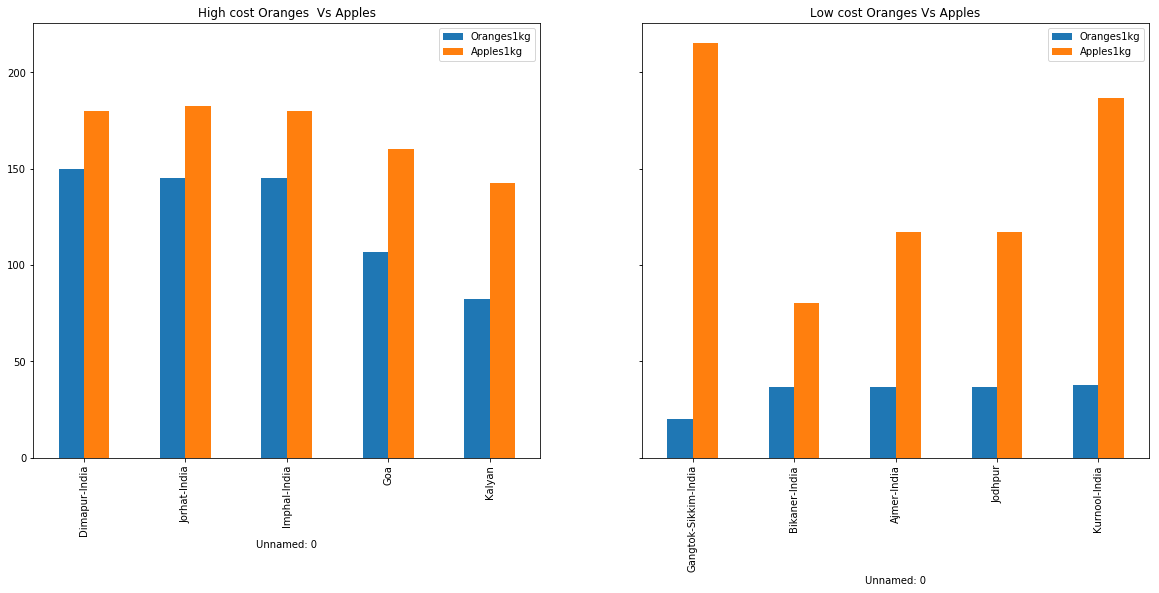

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Oranges  Vs Apples")
high_orangesandapples.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Oranges Vs Apples")
low_orangesandapples.head().plot(kind='bar',ax=ax2)
plt.show()

# Potato and Lettucehead

# High  cost Potato and Low cost Potato comparing with Lettucehead

In [21]:
df1['Lettucehead'].describe()

count    103.000000
mean      33.025146
std       12.942375
min       11.670000
25%       25.000000
50%       30.390000
75%       41.040000
max       93.330000
Name: Lettucehead, dtype: float64

In [22]:
df1['Lettucehead'].fillna(df1['Lettucehead'].mean(),inplace=True)

In [23]:
# high potato 
high_potato = df1.sort_values('Potato1kg',ascending=False)
print("==========High cost Potato=======")
high_potato.head()

# high potato vs lettucehead
high_potatoandlettucehead= high_potato[['Potato1kg','Lettucehead']]
print("========= Comparing  High cost potato   vs Lettucehead ========== ")
high_potatoandlettucehead.head()

# low potato                                     
low_potato = df1.sort_values('Potato1kg',ascending=True)
print("================== Low Potato cost ===============")
low_potato.head()

#low potato vs lettucehead
low_potatoandlettucehead = low_potato[['Potato1kg','Lettucehead']]
print("================ Comparing Low cost potato Vs Lettucehead  ===========")
low_potatoandlettucehead.head()

==========High cost Potato=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Malappuram-India,325.0,287.5,50.00,18.50,NaN,NaN,150.00,100.0,80.0,45.00,...,1033333.33,0.80,200.0,100000.00,1200.0,2500.00,6000.00,10000.0,18000.00,NaN
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.0,80.0,43.33,...,1050000.00,1.00,100.0,36000.00,1500.0,1750.00,5000.00,8000.0,NaN,5.0
Dimapur-India,650.0,75.0,85.00,17.50,27.50,150.00,200.00,180.0,150.0,40.00,...,NaN,1.00,500.0,NaN,1500.0,2000.00,NaN,5000.0,NaN,NaN
Bongaigaon-India,600.0,120.0,80.00,10.00,35.00,70.00,200.00,120.0,70.0,40.00,...,1700000.00,1.00,300.0,70000.00,4500.0,5000.00,3500.00,10000.0,NaN,NaN
Erode-India,450.0,125.0,76.67,16.25,29.50,58.33,207.50,140.0,75.0,34.21,...,1600000.00,0.83,400.0,133333.33,1750.0,2333.33,6333.33,10750.0,56527.82,10.0


========= Comparing  High cost potato   vs Lettucehead ========== 


,Potato1kg,Lettucehead
Unnamed: 0,,
Malappuram-India,45.00,45.00
Aizawl-India,43.33,23.33
Dimapur-India,40.00,50.00
Bongaigaon-India,40.00,40.00
Erode-India,34.21,25.00


================== Low Potato cost ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Jammu,700.0,100.0,110.00,15.00,26.50,66.00,150.00,86.67,50.00,13.33,...,1397625.00,1.00,550.0,86000.00,3000.00,2000.00,4360.00,16000.00,111527.82,9.40
Bhopal,600.0,165.0,91.25,12.42,27.32,59.00,203.33,127.14,57.50,14.17,...,1537222.22,0.85,500.0,74600.00,2330.00,2436.36,4266.67,9230.77,32291.73,9.80
Bathinda-India,650.0,150.0,85.00,12.22,23.33,69.67,500.00,175.00,80.00,15.00,...,1250000.00,0.63,0.0,55000.00,3000.00,4333.33,3666.67,10666.67,40902.86,11.00
Bikaner-India,450.0,90.0,82.50,10.00,21.67,62.50,275.00,80.00,36.67,15.00,...,1060000.00,0.98,450.0,125000.00,3666.67,2750.00,3500.00,9500.00,39027.82,9.67
Jabalpur,600.0,170.0,106.67,12.83,27.32,65.00,203.33,113.33,57.50,15.00,...,1601600.00,0.80,600.0,81666.67,2330.00,2436.36,4500.00,11333.33,151273.18,9.80


================ Comparing Low cost potato Vs Lettucehead  ===========


,Potato1kg,Lettucehead
Unnamed: 0,,
Jammu,13.33,20.000000
Bhopal,14.17,30.000000
Bathinda-India,15.00,33.025146
Bikaner-India,15.00,60.000000
Jabalpur,15.00,30.000000


Text(0.5, 1.0, 'High cost Potato  Vs Lettucehead')

Text(0.5, 1.0, 'Low cost Potato Vs Lettucehead')

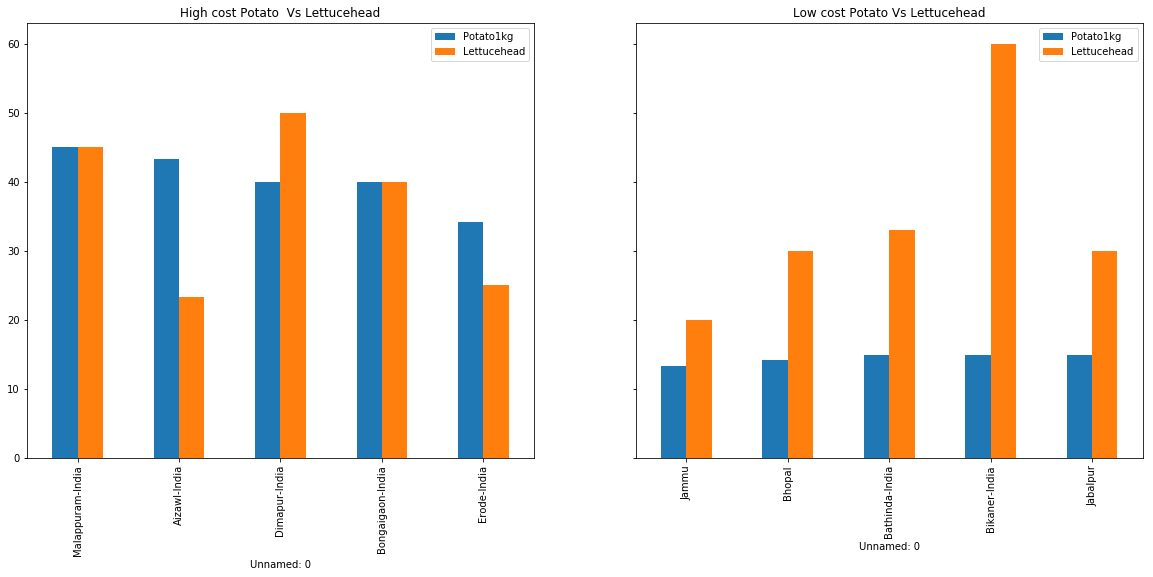

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Potato  Vs Lettucehead")
high_potatoandlettucehead.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Potato Vs Lettucehead")
low_potatoandlettucehead.head().plot(kind='bar',ax=ax2)
plt.show()

# High cost Lettucehead and Low cost Lettucehead comapring with Potato

In [25]:
# high lettucehead 
high_lettucehead = df1.sort_values('Lettucehead',ascending=False)
print("==========High cost Lettucehead=======")
high_lettucehead.head()

# high lettucehead vs pootato
high_lettuceheadandpotato= high_lettucehead[['Lettucehead','Potato1kg']]
print("========= Comparing  High cost Lettucehead   vs Potato ========== ")
high_lettuceheadandpotato.head()

# low lettucehead                                    
low_lettucehead = df1.sort_values('Lettucehead',ascending=True)
print("================== Low Lettucehead cost ===============")
low_lettucehead.head()

#low lettucehead vs potato
low_lettuceheadandpotato = low_lettucehead[['Lettucehead','Potato1kg']]
print("================ Comparing Low cost Lettucehead Vs Potato  ===========")
low_lettuceheadandpotato.head()

==========High cost Lettucehead=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Guwahati,500.0,90.0,86.40,10.0,36.25,69.60,250.0,124.00,53.33,20.5,...,1592777.78,0.88,750.0,116133.33,2509.90,2816.53,4944.44,11680.0,44663.71,9.67
Jorhat-India,600.0,90.0,50.00,10.0,22.50,60.00,250.0,182.50,145.00,17.5,...,1600000.00,0.95,500.0,NaN,1250.00,2500.00,2250.00,4750.0,33000.00,9.00
Bikaner-India,450.0,90.0,82.50,10.0,21.67,62.50,275.0,80.00,36.67,15.0,...,1060000.00,0.98,450.0,125000.00,3666.67,2750.00,3500.00,9500.0,39027.82,9.67
Jodhpur,650.0,90.0,83.75,15.0,25.00,62.50,275.0,117.00,36.67,18.3,...,1627000.00,0.85,600.0,125000.00,3280.00,2500.00,4500.00,11185.0,39444.76,10.00
Kurnool-India,700.0,100.0,60.00,15.0,31.33,57.33,210.0,186.67,37.50,25.0,...,2300000.00,1.10,450.0,185000.00,1666.67,2000.00,4833.33,10500.0,33906.32,10.33


========= Comparing  High cost Lettucehead   vs Potato ========== 


,Lettucehead,Potato1kg
Unnamed: 0,,
Guwahati,93.33,20.5
Jorhat-India,75.00,17.5
Bikaner-India,60.00,15.0
Jodhpur,60.00,18.3
Kurnool-India,59.00,25.0


================== Low Lettucehead cost ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Lucknow-Lakhnau,500.0,120.0,160.00,15.80,27.44,61.89,218.0,115.56,54.29,20.00,...,1552916.67,0.77,366.67,73125.00,2575.00,2542.81,6305.56,15190.48,35693.61,9.33
Allahabad-India,500.0,120.0,106.67,14.00,27.44,62.13,200.0,100.00,40.00,16.17,...,1627000.00,0.77,450.00,68666.67,2439.80,2269.67,4916.67,11000.00,53819.55,9.33
Latur-India,500.0,115.0,155.00,12.00,32.50,60.00,175.0,135.00,75.00,20.00,...,850000.00,0.86,450.00,85000.00,1700.00,2500.00,4000.00,9333.33,NaN,9.62
Bhilai-India,500.0,120.0,90.00,12.83,26.25,60.00,175.0,114.00,65.00,17.60,...,1601600.00,0.78,200.00,60000.00,2250.00,2250.00,3000.00,6300.00,32604.21,10.17
Kota-India,600.0,100.0,107.50,11.67,25.83,65.00,240.0,117.00,40.00,18.33,...,1507625.00,0.90,50.00,91500.00,2535.71,2486.67,6250.00,12000.00,28733.84,8.81


================ Comparing Low cost Lettucehead Vs Potato  ===========


,Lettucehead,Potato1kg
Unnamed: 0,,
Lucknow-Lakhnau,11.67,20.00
Allahabad-India,11.67,16.17
Latur-India,15.00,20.00
Bhilai-India,16.67,17.60
Kota-India,18.33,18.33


Text(0.5, 1.0, 'High cost Lettucehead Vs Potato')

Text(0.5, 1.0, 'Low cost Lettucehead Vs Potato')

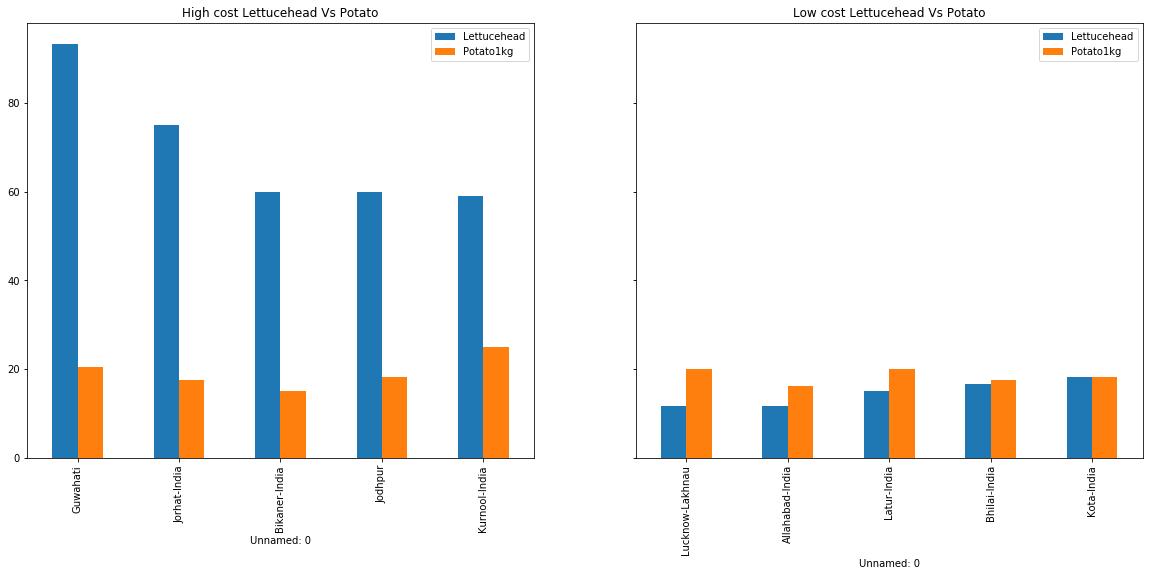

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Lettucehead Vs Potato")
high_lettuceheadandpotato.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Lettucehead Vs Potato")
low_lettuceheadandpotato.head().plot(kind='bar',ax=ax2)
plt.show()

# Domestic beer and Imported beer 

## High cost Domesticbeer and Low cost Domesticbeer comparing with Imported beer

In [27]:
df1['ImportedBeerliterbottle'].describe()

count    104.000000
mean     172.377692
std       30.705114
min       85.000000
25%      150.000000
50%      176.670000
75%      200.000000
max      232.610000
Name: ImportedBeerliterbottle, dtype: float64

In [28]:
df1['ImportedBeerliterbottle'].fillna(df1['ImportedBeerliterbottle'].median(),inplace=True)

In [29]:
# high domestic beer 
high_dbeer = df1.sort_values('DomesticBeerliterdraught',ascending=False)
print("==========High cost Domestic beer=======")
high_dbeer.head()

# high domesticbeer vs importedbeer
high_dbeerandibeer= high_dbeer[['DomesticBeerliterdraught','ImportedBeerliterbottle']]
print("========= Comparing  High cost Domestic beer  vs Imported beer  ========== ")
high_dbeerandibeer.head()

# low domestic beer                                    
low_dbeer = df1.sort_values('DomesticBeerliterdraught',ascending=True)
print("================== Low cost Domestic beer ===============")
low_dbeer.head()

#low domesticbeer
low_dbeerandibeer = low_dbeer[['DomesticBeerliterdraught','ImportedBeerliterbottle']]
print("================ Comparing Low cost Domestic beer Vs Imported beer ===========")
low_dbeerandibeer.head()

==========High cost Domestic beer=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Malappuram-India,325.0,287.5,50.00,18.50,NaN,NaN,150.00,100.00,80.00,45.00,...,1033333.33,0.80,200.00,100000.00,1200.00,2500.00,6000.00,10000.00,18000.00,NaN
Mangalore,850.0,200.0,155.71,16.42,26.71,58.67,245.00,138.33,73.00,26.17,...,1557250.00,0.92,466.67,75108.98,2140.00,2699.00,6299.94,14750.00,36634.41,8.45
Mumbai,1200.0,180.0,150.26,13.78,29.98,66.50,271.30,160.74,82.22,25.21,...,1618459.69,0.79,789.67,166084.34,2460.14,3080.15,19367.82,46350.65,187957.72,9.25
Jabalpur,600.0,170.0,106.67,12.83,27.32,65.00,203.33,113.33,57.50,15.00,...,1601600.00,0.80,600.00,81666.67,2330.00,2436.36,4500.00,11333.33,151273.18,9.80
Nagpur,500.0,165.0,101.67,12.83,27.32,65.00,175.00,111.78,57.50,20.00,...,1601600.00,0.80,700.00,81666.67,2330.00,2300.00,5333.33,12166.67,41979.25,10.06


========= Comparing  High cost Domestic beer  vs Imported beer  ========== 


,DomesticBeerliterdraught,ImportedBeerliterbottle
Unnamed: 0,,
Malappuram-India,287.5,176.67
Mangalore,200.0,156.67
Mumbai,180.0,232.61
Jabalpur,170.0,185.00
Nagpur,165.0,185.00


================== Low cost Domestic beer ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Nalgonda-India,400.0,75.0,NaN,5.0,34.53,54.33,135.0,125.0,59.500000,22.0,...,900000.0,1.00,NaN,NaN,NaN,600.00,2500.00,6000.00,16145.87,11.0
Dimapur-India,650.0,75.0,85.0,17.5,27.50,150.00,200.0,180.0,150.000000,40.0,...,NaN,1.00,500.0,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN
Kolhapur,400.0,75.0,75.0,15.0,23.00,58.00,185.0,165.0,56.670000,20.0,...,1818000.0,0.88,275.0,140000.0,1866.67,1933.33,5500.00,12000.00,43831.08,10.5
Durgapur-India,550.0,80.0,324.0,12.5,35.00,64.00,210.0,80.0,64.848704,17.0,...,NaN,NaN,NaN,96000.0,NaN,2350.00,6666.67,13000.00,16038.23,9.0
Gangtok-Sikkim-India,600.0,80.0,85.0,15.0,30.00,72.00,200.0,215.0,20.000000,30.0,...,NaN,NaN,NaN,NaN,1500.00,3333.33,3166.67,8666.67,32291.73,7.0


================ Comparing Low cost Domestic beer Vs Imported beer ===========


,DomesticBeerliterdraught,ImportedBeerliterbottle
Unnamed: 0,,
Nalgonda-India,75.0,176.67
Dimapur-India,75.0,100.00
Kolhapur,75.0,150.00
Durgapur-India,80.0,176.67
Gangtok-Sikkim-India,80.0,85.00


Text(0.5, 1.0, 'High cost Domestic beer Vs Imported beer')

Text(0.5, 1.0, 'Low cost Domestic beer Vs Imported beer')

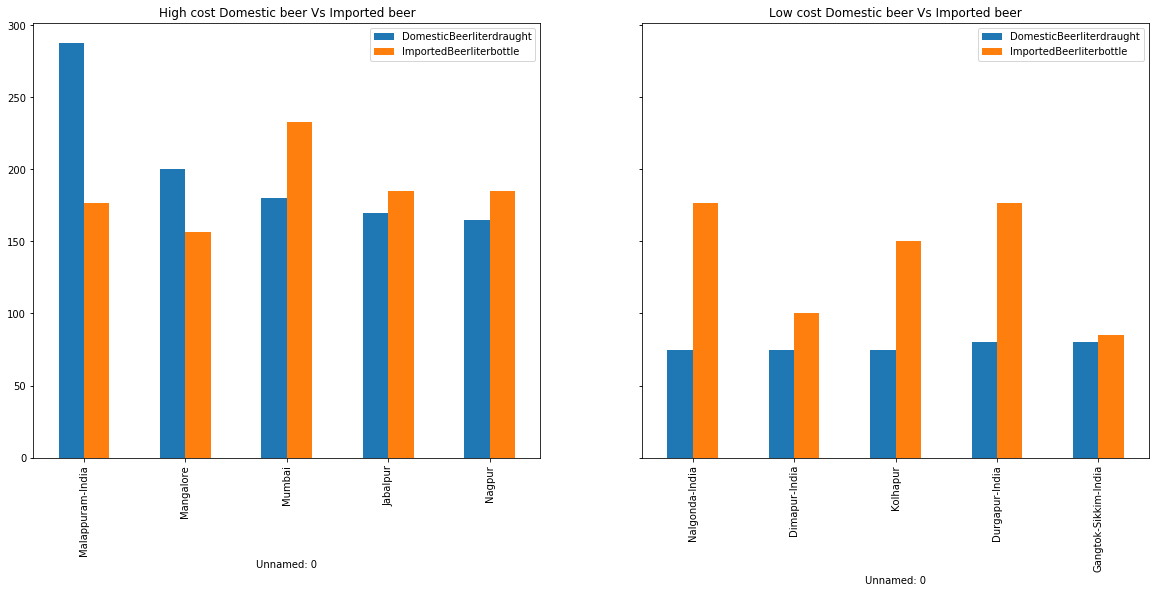

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Domestic beer Vs Imported beer")
high_dbeerandibeer.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Domestic beer Vs Imported beer")
low_dbeerandibeer.head().plot(kind='bar',ax=ax2)
plt.show()

## High cost Imported beer and Low cost Imported beer comparing with Domestic beer

In [31]:
# high imported beer 
high_ibeer = df1.sort_values('ImportedBeerliterbottle',ascending=False)
print("==========High cost Imported beer=======")
high_ibeer.head()

# high imported beer vs domestic beer
high_ibeeranddbeer= high_ibeer[['ImportedBeerliterbottle','DomesticBeerliterdraught']]
print("========= Comparing  High cost Imported beer Vs Domestic beer  ========== ")
high_ibeeranddbeer.head()

# low imported beer                                    
low_ibeer = df1.sort_values('ImportedBeerliterbottle',ascending=True)
print("================== Low cost Imported  beer ===============")
low_ibeer.head()

#low importedbeer vs domestic beer  
low_ibeeranddbeer = low_ibeer[['ImportedBeerliterbottle','DomesticBeerliterdraught']]
print("================ Comparing Low cost  Imported beer Vs Domestic beer ===========")
low_ibeeranddbeer.head()

==========High cost Imported beer=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Mumbai,1200.0,180.0,150.26,13.78,29.98,66.50,271.30,160.74,82.22,25.21,...,1618459.69,0.79,789.67,166084.34,2460.14,3080.15,19367.82,46350.65,187957.72,9.25
Amravati,500.0,155.0,101.67,12.83,27.32,60.00,175.00,113.33,57.50,20.00,...,1600000.00,0.73,1425.00,81666.67,2250.00,2000.00,7666.67,15666.67,45746.62,10.06
Chandigarh,800.0,150.0,115.33,17.41,35.00,62.33,281.67,145.38,80.91,23.33,...,1646904.76,0.83,484.21,145333.33,3393.33,2969.57,7038.46,17240.00,55540.73,9.61
Aurangabad,700.0,155.0,132.71,18.33,39.60,60.00,200.00,131.67,63.33,25.00,...,1470800.00,0.73,500.00,122500.00,2100.00,1900.00,5700.00,11000.00,29861.15,8.70
Ghaziabad,600.0,125.0,121.82,16.00,30.83,64.18,250.00,140.00,65.00,20.00,...,1549625.00,0.85,750.00,95400.00,2900.00,2580.00,5500.00,12944.44,45000.00,9.38


========= Comparing  High cost Imported beer Vs Domestic beer  ========== 


,ImportedBeerliterbottle,DomesticBeerliterdraught
Unnamed: 0,,
Mumbai,232.61,180.0
Amravati,225.00,155.0
Chandigarh,225.00,150.0
Aurangabad,225.00,155.0
Ghaziabad,221.67,125.0


================== Low cost Imported  beer ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gangtok-Sikkim-India,600.0,80.0,85.0,15.00,30.00,72.00,200.00,215.00,20.00,30.00,...,NaN,NaN,NaN,NaN,1500.00,3333.33,3166.67,8666.67,32291.73,7.00
Dimapur-India,650.0,75.0,85.0,17.50,27.50,150.00,200.00,180.00,150.00,40.00,...,NaN,1.00,500.0,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN
Imphal-India,650.0,90.0,65.0,10.00,27.50,120.00,246.67,180.00,145.00,25.75,...,1600000.00,0.95,NaN,NaN,1500.00,2000.00,1750.00,6000.00,30218.80,9.00
Berhampur-India,475.0,100.0,95.0,11.67,30.00,60.00,178.75,142.50,63.33,20.00,...,1473111.11,1.00,350.0,85000.0,1941.67,2314.29,3000.00,7500.00,26909.78,9.75
Kurnool-India,700.0,100.0,60.0,15.00,31.33,57.33,210.00,186.67,37.50,25.00,...,2300000.00,1.10,450.0,185000.0,1666.67,2000.00,4833.33,10500.00,33906.32,10.33


================ Comparing Low cost  Imported beer Vs Domestic beer ===========


,ImportedBeerliterbottle,DomesticBeerliterdraught
Unnamed: 0,,
Gangtok-Sikkim-India,85.0,80.0
Dimapur-India,100.0,75.0
Imphal-India,100.0,90.0
Berhampur-India,105.0,100.0
Kurnool-India,120.0,100.0


Text(0.5, 1.0, 'High cost Imported beer Vs Domestic beer')

Text(0.5, 1.0, 'Low cost  Imported beer Vs Domestic beer')

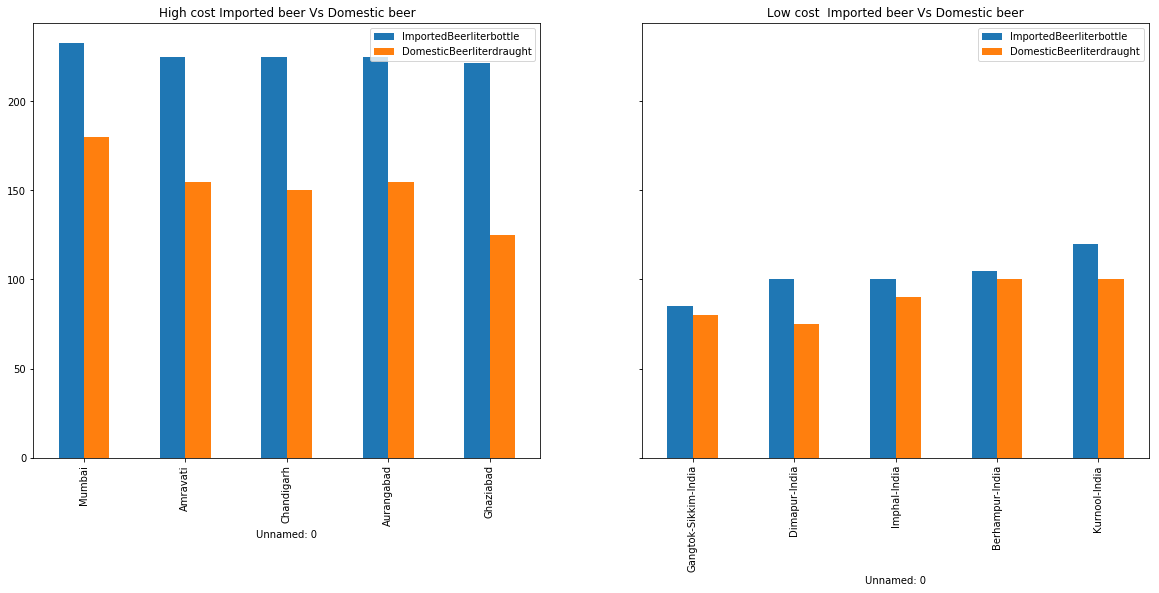

In [32]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Imported beer Vs Domestic beer")
high_ibeeranddbeer.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost  Imported beer Vs Domestic beer")
low_ibeeranddbeer.head().plot(kind='bar',ax=ax2)
plt.show()

# Chicken and Eggs

# High cost Chicken and Low cost Chicken comparing with Eggs  

In [33]:
df1.keys()

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

In [34]:
df1['Eggsregular'].describe()

count    108.000000
mean      64.199259
std       11.110627
min       46.750000
25%       60.000000
50%       62.130000
75%       65.835000
max      150.000000
Name: Eggsregular, dtype: float64

In [35]:
df1['Eggsregular'].fillna(df1['Eggsregular'].mean(),inplace=True)

In [36]:
# high chicken 
high_chicken = df1.sort_values('ChickenBreastsBonelessSkinless1kg',ascending=False)
print("==========High cost Chicken=======")
high_chicken.head()

# high chicken vs eggs
high_chickenandeggs= high_chicken[['ChickenBreastsBonelessSkinless1kg','Eggsregular']]
print("========= Comparing  High cost Chicken Vs Eggs   ========== ")
high_chickenandeggs.head()

# low chicken                                    
low_chicken = df1.sort_values('ChickenBreastsBonelessSkinless1kg',ascending=True)
print("================== Low cost Chicken ===============")
low_chicken.head()

#low chicken vs eggs  
low_chickenandeggs = low_chicken[['ChickenBreastsBonelessSkinless1kg','Eggsregular']]
print("================ Comparing Low cost Chicken Vs Eggs ===========")
low_chickenandeggs.head()

==========High cost Chicken=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Bathinda-India,650.0,150.0,85.00,12.22,23.33,69.67,500.00,175.00,80.00,15.00,...,1250000.00,0.63,0.00,55000.00,3000.00,4333.33,3666.67,10666.67,40902.86,11.00
Moradabad-India,800.0,115.0,73.33,10.00,30.00,64.00,304.44,80.00,47.50,17.50,...,1500000.00,1.03,350.00,80000.00,1566.67,2166.67,4833.33,10333.33,163518.81,8.67
Ernakulam,375.0,120.0,150.00,20.00,25.00,53.33,290.00,150.00,46.67,26.67,...,1685125.00,0.97,500.00,117500.00,2142.86,2625.00,7357.14,15000.00,132558.10,9.94
Chandigarh,800.0,150.0,115.33,17.41,35.00,62.33,281.67,145.38,80.91,23.33,...,1646904.76,0.83,484.21,145333.33,3393.33,2969.57,7038.46,17240.00,55540.73,9.61
Goa,1100.0,80.0,120.00,16.25,33.33,61.00,280.00,160.00,106.67,20.00,...,1566875.00,0.93,360.00,76000.00,2433.33,2914.09,8033.90,19111.11,41875.00,10.56


========= Comparing  High cost Chicken Vs Eggs   ========== 


,ChickenBreastsBonelessSkinless1kg,Eggsregular
Unnamed: 0,,
Bathinda-India,500.00,69.67
Moradabad-India,304.44,64.00
Ernakulam,290.00,53.33
Chandigarh,281.67,62.33
Goa,280.00,61.00


================== Low cost Chicken ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Dharwad-India,400.0,90.0,30.0,10.0,23.50,58.000000,80.00,120.00,50.0,20.00,...,1000000.00,1.0,250.0,50000.00,1500.0,2000.00,7500.0,8500.0,40000.00,12.00
Nalgonda-India,400.0,75.0,NaN,5.0,34.53,54.330000,135.00,125.00,59.5,22.00,...,900000.00,1.0,NaN,NaN,NaN,600.00,2500.0,6000.0,16145.87,11.00
Jammu,700.0,100.0,110.0,15.0,26.50,66.000000,150.00,86.67,50.0,13.33,...,1397625.00,1.0,550.0,86000.00,3000.0,2000.00,4360.0,16000.0,111527.82,9.40
Malappuram-India,325.0,287.5,50.0,18.5,NaN,64.199259,150.00,100.00,80.0,45.00,...,1033333.33,0.8,200.0,100000.00,1200.0,2500.00,6000.0,10000.0,18000.00,NaN
Muzaffarpur-India,500.0,100.0,70.0,10.0,20.00,68.000000,158.33,106.67,57.5,21.00,...,1627000.00,0.8,NaN,68666.67,2287.5,2362.38,4500.0,10000.0,NaN,9.61


================ Comparing Low cost Chicken Vs Eggs ===========


,ChickenBreastsBonelessSkinless1kg,Eggsregular
Unnamed: 0,,
Dharwad-India,80.00,58.000000
Nalgonda-India,135.00,54.330000
Jammu,150.00,66.000000
Malappuram-India,150.00,64.199259
Muzaffarpur-India,158.33,68.000000


Text(0.5, 1.0, 'High cost Chicken Vs Eggs')

Text(0.5, 1.0, 'Low cost Chicken Vs Eggs')

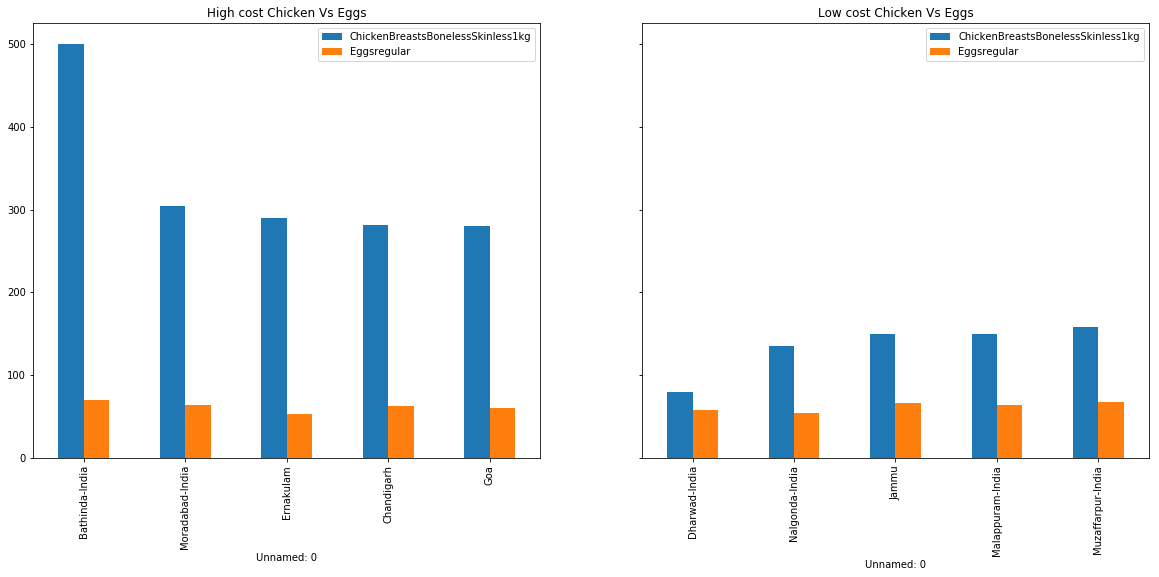

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Chicken Vs Eggs")
high_chickenandeggs.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Chicken Vs Eggs")
low_chickenandeggs.head().plot(kind='bar',ax=ax2)
plt.show()

# High cost Eggs and Low cost Eggs comparing with Chicken

In [38]:
# high eggs
high_eggs = df1.sort_values('Eggsregular',ascending=False)
print("==========High cost Eggs=======")
high_eggs.head()

# high eggs vs chicken
high_eggsandchicken= high_eggs[['Eggsregular','ChickenBreastsBonelessSkinless1kg']]
print("========= Comparing  High cost Eggs Vs Chicken  ========== ")
high_eggsandchicken.head()

# low eggs                                    
low_eggs = df1.sort_values('Eggsregular',ascending=True)
print("================== Low cost Eggs ===============")
low_eggs.head()

#low eggs vs chicken  
low_eggsandchicken = low_eggs[['Eggsregular','ChickenBreastsBonelessSkinless1kg']]
print("================ Comparing Low cost Eggs Vs Chicken ===========")
low_eggsandchicken.head()

==========High cost Eggs=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Dimapur-India,650.0,75.0,85.00,17.50,27.50,150.00,200.00,180.00,150.00,40.00,...,NaN,1.00,500.00,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN
Imphal-India,650.0,90.0,65.00,10.00,27.50,120.00,246.67,180.00,145.00,25.75,...,1600000.00,0.95,NaN,NaN,1500.00,2000.00,1750.00,6000.00,30218.80,9.00
Gurgaon,1000.0,130.0,119.44,14.96,29.30,78.33,265.48,148.48,73.33,22.21,...,1727222.22,0.76,561.90,196538.46,2851.85,3353.12,9910.71,26937.50,74548.73,9.29
Agartala-India,550.0,100.0,109.67,10.00,33.33,77.00,226.67,118.00,53.33,25.00,...,1900000.00,1.00,466.67,NaN,2999.50,2000.00,4333.33,8166.67,21791.54,10.83
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.33,266.67,140.00,80.00,43.33,...,1050000.00,1.00,100.00,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00


========= Comparing  High cost Eggs Vs Chicken  ========== 


,Eggsregular,ChickenBreastsBonelessSkinless1kg
Unnamed: 0,,
Dimapur-India,150.00,200.00
Imphal-India,120.00,246.67
Gurgaon,78.33,265.48
Agartala-India,77.00,226.67
Aizawl-India,73.33,266.67


================== Low cost Eggs ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Kakinada-India,425.0,110.0,126.67,10.75,26.25,46.75,203.33,135.0,66.67,20.00,...,1025000.0,0.51,350.0,166666.67,1750.00,2500.0,3666.67,11333.33,78038.35,7.00
Ernakulam,375.0,120.0,150.00,20.00,25.00,53.33,290.00,150.0,46.67,26.67,...,1685125.0,0.97,500.0,117500.00,2142.86,2625.0,7357.14,15000.00,132558.10,9.94
Nalgonda-India,400.0,75.0,NaN,5.00,34.53,54.33,135.00,125.0,59.50,22.00,...,900000.0,1.00,NaN,NaN,NaN,600.0,2500.00,6000.00,16145.87,11.00
Davanagere-Davangere-India,300.0,107.5,90.00,12.00,25.00,54.50,185.00,167.5,42.50,20.00,...,NaN,NaN,NaN,150000.00,1500.00,2500.0,3000.00,14000.00,19375.04,NaN
Bilaspur-India,725.0,150.0,90.00,15.67,28.33,56.67,200.00,80.0,60.00,20.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,6000.00,55690.00,NaN


================ Comparing Low cost Eggs Vs Chicken ===========


,Eggsregular,ChickenBreastsBonelessSkinless1kg
Unnamed: 0,,
Kakinada-India,46.75,203.33
Ernakulam,53.33,290.00
Nalgonda-India,54.33,135.00
Davanagere-Davangere-India,54.50,185.00
Bilaspur-India,56.67,200.00


Text(0.5, 1.0, 'High cost Eggs Vs Chicken')

Text(0.5, 1.0, 'Low cost Eggs Vs Chicken')

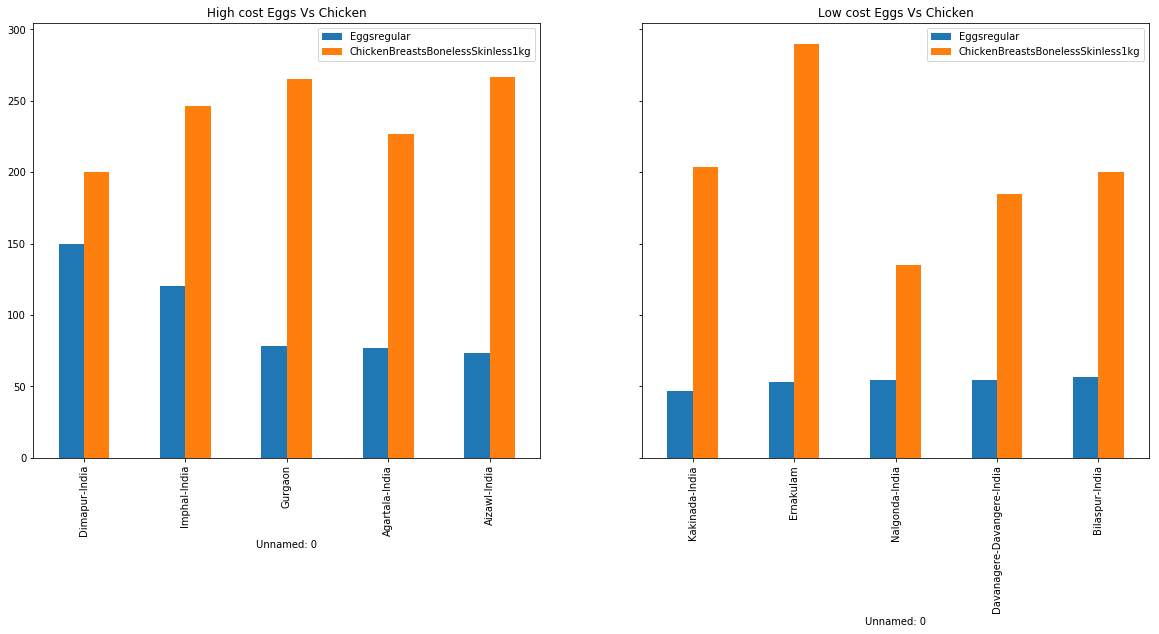

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Eggs Vs Chicken")
high_eggsandchicken.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Eggs Vs Chicken")
low_eggsandchicken.head().plot(kind='bar',ax=ax2)
plt.show()

# Taxi and Gasoline

# High cost Taxi and Low cost Taxi comapring with Gasoline

In [40]:
df1['Taxi1kmNormalTariff'].describe()

count    104.000000
mean      14.439904
std        6.052711
min        7.500000
25%       11.000000
50%       12.500000
75%       15.000000
max       50.000000
Name: Taxi1kmNormalTariff, dtype: float64

In [41]:
df1['Taxi1kmNormalTariff'].fillna(df1['Taxi1kmNormalTariff'].mean(),inplace=True)

In [42]:
df1['Taxi1kmNormalTariff'].isnull().any()

False

In [43]:
df1['Gasolineliter'].describe()

count    106.000000
mean      74.851509
std        3.450237
min       59.000000
25%       73.275000
50%       75.190000
75%       77.090000
max       81.670000
Name: Gasolineliter, dtype: float64

In [44]:
df1['Gasolineliter'].fillna(df1['Gasolineliter'].median(),inplace=True)

In [45]:
# high taxi
high_taxi = df1.sort_values('Taxi1kmNormalTariff',ascending=False)
print("==========High cost Taxi=======")
high_taxi.head()

# high taxi vs gasoline
high_taxiandgasoline= high_taxi[['Taxi1kmNormalTariff','Gasolineliter']]
print("========= Comparing  High cost Taxi Vs Gasoline  ========== ")
high_taxiandgasoline.head()

# low taxi                                    
low_taxi = df1.sort_values('Taxi1kmNormalTariff',ascending=True)
print("================== Low cost Taxi ===============")
low_taxi.head()

#low taxi vs gasoline  
low_taxiandgasoline = low_taxi[['Taxi1kmNormalTariff','Gasolineliter']]
print("================ Comparing Low cost Taxi Vs Gasoline ===========")
low_taxiandgasoline.head()

==========High cost Taxi=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Kakinada-India,425.0,110.0,126.67,10.75,26.25,46.750000,203.33,135.00,66.67,20.00,...,1025000.00,0.51,350.0,166666.67,1750.00,2500.00,3666.67,11333.33,78038.35,7.00
Malappuram-India,325.0,287.5,50.00,18.50,NaN,64.199259,150.00,100.00,80.00,45.00,...,1033333.33,0.80,200.0,100000.00,1200.00,2500.00,6000.00,10000.00,18000.00,NaN
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.330000,266.67,140.00,80.00,43.33,...,1050000.00,1.00,100.0,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
Kurnool-India,700.0,100.0,60.00,15.00,31.33,57.330000,210.00,186.67,37.50,25.00,...,2300000.00,1.10,450.0,185000.00,1666.67,2000.00,4833.33,10500.00,33906.32,10.33
Goa,1100.0,80.0,120.00,16.25,33.33,61.000000,280.00,160.00,106.67,20.00,...,1566875.00,0.93,360.0,76000.00,2433.33,2914.09,8033.90,19111.11,41875.00,10.56


========= Comparing  High cost Taxi Vs Gasoline  ========== 


,Taxi1kmNormalTariff,Gasolineliter
Unnamed: 0,,
Kakinada-India,50.0,79.00
Malappuram-India,40.0,75.00
Aizawl-India,30.0,59.00
Kurnool-India,30.0,76.67
Goa,25.5,65.58


================== Low cost Taxi ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Durgapur-India,550.0,80.0,324.00,12.5,35.00,64.00,210.00,80.00,64.848704,17.00,...,NaN,NaN,NaN,96000.00,NaN,2350.00,6666.67,13000.00,16038.23,9.00
Agartala-India,550.0,100.0,109.67,10.0,33.33,77.00,226.67,118.00,53.330000,25.00,...,1900000.0,1.00,466.67,NaN,2999.5,2000.00,4333.33,8166.67,21791.54,10.83
Bhagalpur-India,500.0,145.0,70.00,13.5,20.00,69.33,158.33,103.33,78.000000,21.00,...,1596200.0,0.80,500.00,45000.00,1400.0,2000.00,1500.00,7500.00,42517.45,9.61
Kanpur,575.0,120.0,106.67,16.0,35.00,62.13,187.00,74.00,40.000000,16.17,...,1663500.0,0.89,533.33,87666.67,2439.8,1868.75,4666.67,11444.44,36273.18,8.80
Gwalior-India,700.0,120.0,106.67,16.0,30.00,62.00,256.00,100.49,45.000000,19.00,...,1600000.0,0.89,563.33,87666.67,2439.8,1750.00,3100.00,9250.00,22685.21,9.00


================ Comparing Low cost Taxi Vs Gasoline ===========


,Taxi1kmNormalTariff,Gasolineliter
Unnamed: 0,,
Durgapur-India,7.5,72.00
Agartala-India,9.0,70.67
Bhagalpur-India,9.0,76.50
Kanpur,9.5,71.55
Gwalior-India,9.5,76.50


Text(0.5, 1.0, 'High cost Taxi Vs Gasoline')

Text(0.5, 1.0, 'Low cost Taxi Vs Gasoline')

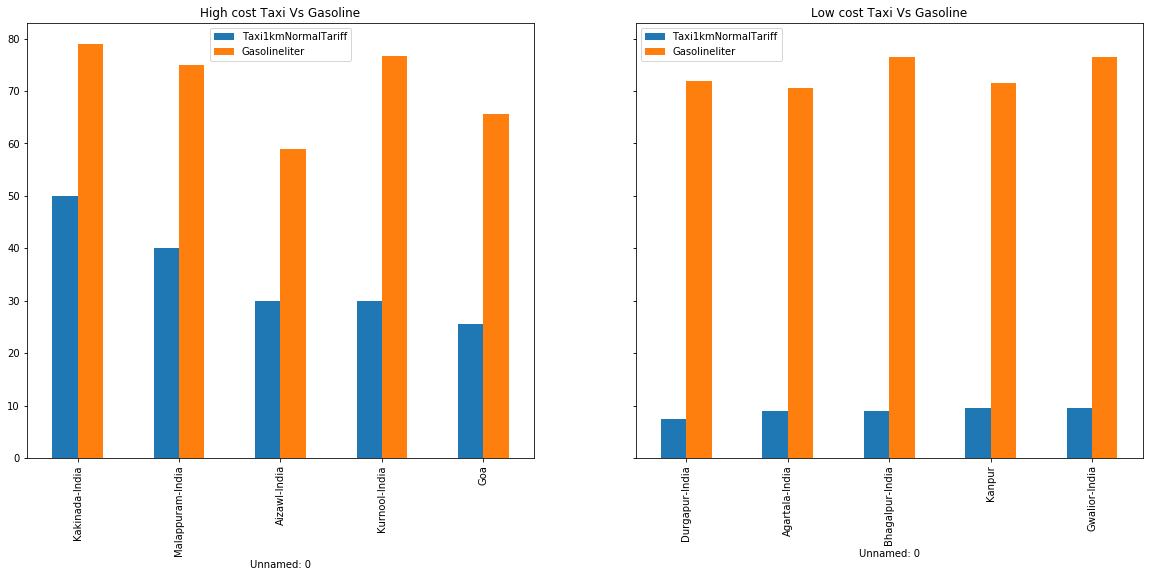

In [46]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Taxi Vs Gasoline")
high_taxiandgasoline.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Taxi Vs Gasoline")
low_taxiandgasoline.head().plot(kind='bar',ax=ax2)
plt.show()

# High cost Gasoline and Low cost Gasoline comparing with Taxi  

In [47]:
# high gasoline
high_gasoline = df1.sort_values('Gasolineliter',ascending=False)
print("==========High cost Gasoline=======")
high_gasoline.head()

# high gasoline vs taxi
high_gasolineandtaxi= high_gasoline[['Gasolineliter','Taxi1kmNormalTariff']]
print("========= Comparing  High cost Gasoline Vs Taxi  ========== ")
high_gasolineandtaxi.head()

# low gasoline                                   
low_gasoline = df1.sort_values('Gasolineliter',ascending=True)
print("================== Low cost Gasoline ===============")
low_gasoline.head()

#low  gasoline vs taxi  
low_gasolineandtaxi = low_gasoline[['Gasolineliter','Taxi1kmNormalTariff']]
print("================ Comparing Low cost Gasoline Vs Taxi ===========")
low_gasolineandtaxi.head()

==========High cost Gasoline=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Aurangabad,700.0,155.0,132.71,18.33,39.60,60.00,200.00,131.67,63.33,25.0,...,1470800.0,0.73,500.0,122500.00,2100.00,1900.00,5700.00,11000.00,29861.15,8.70
Amravati,500.0,155.0,101.67,12.83,27.32,60.00,175.00,113.33,57.50,20.0,...,1600000.0,0.73,1425.0,81666.67,2250.00,2000.00,7666.67,15666.67,45746.62,10.06
Nashik-India,500.0,135.0,97.86,12.00,35.00,63.60,241.67,132.50,67.50,20.0,...,1538500.0,0.92,320.0,66250.00,2883.33,2571.43,5000.00,9750.00,31840.30,11.50
Bongaigaon-India,600.0,120.0,80.00,10.00,35.00,70.00,200.00,120.00,70.00,40.0,...,1700000.0,1.00,300.0,70000.00,4500.00,5000.00,3500.00,10000.00,NaN,NaN
Kakinada-India,425.0,110.0,126.67,10.75,26.25,46.75,203.33,135.00,66.67,20.0,...,1025000.0,0.51,350.0,166666.67,1750.00,2500.00,3666.67,11333.33,78038.35,7.00


========= Comparing  High cost Gasoline Vs Taxi  ========== 


,Gasolineliter,Taxi1kmNormalTariff
Unnamed: 0,,
Aurangabad,81.67,22.500000
Amravati,80.32,14.000000
Nashik-India,79.83,20.000000
Bongaigaon-India,79.00,14.439904
Kakinada-India,79.00,50.000000


================== Low cost Gasoline ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Aizawl-India,300.0,85.0,75.0,15.00,26.67,73.33,266.67,140.0,80.00,43.33,...,1050000.0,1.00,100.0,36000.0,1500.00,1750.00,5000.0,8000.00,NaN,5.00
Dimapur-India,650.0,75.0,85.0,17.50,27.50,150.00,200.00,180.0,150.00,40.00,...,NaN,1.00,500.0,NaN,1500.00,2000.00,NaN,5000.00,NaN,NaN
Goa,1100.0,80.0,120.0,16.25,33.33,61.00,280.00,160.0,106.67,20.00,...,1566875.0,0.93,360.0,76000.0,2433.33,2914.09,8033.9,19111.11,41875.0,10.56
Imphal-India,650.0,90.0,65.0,10.00,27.50,120.00,246.67,180.0,145.00,25.75,...,1600000.0,0.95,NaN,NaN,1500.00,2000.00,1750.0,6000.00,30218.8,9.00
Jorhat-India,600.0,90.0,50.0,10.00,22.50,60.00,250.00,182.5,145.00,17.50,...,1600000.0,0.95,500.0,NaN,1250.00,2500.00,2250.0,4750.00,33000.0,9.00


================ Comparing Low cost Gasoline Vs Taxi ===========


,Gasolineliter,Taxi1kmNormalTariff
Unnamed: 0,,
Aizawl-India,59.00,30.000000
Dimapur-India,65.00,14.439904
Goa,65.58,25.500000
Imphal-India,66.09,10.000000
Jorhat-India,66.09,10.000000


Text(0.5, 1.0, 'High cost Gasoline Vs Taxi')

Text(0.5, 1.0, 'Low cost Gasoline Vs Taxi')

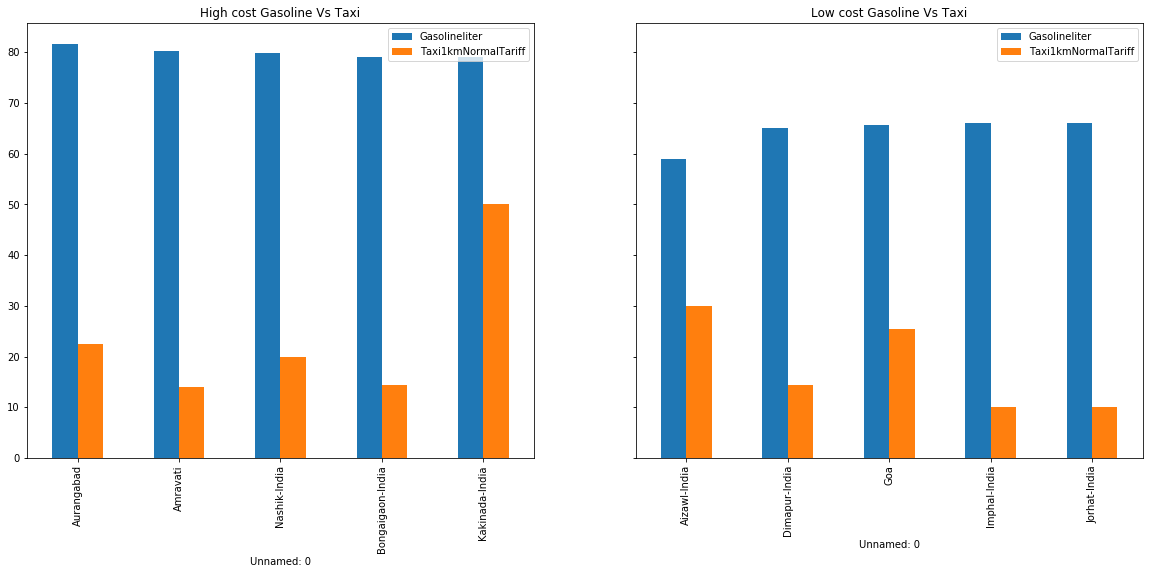

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Gasoline Vs Taxi")
high_gasolineandtaxi.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Gasoline Vs Taxi")
low_gasolineandtaxi.head().plot(kind='bar',ax=ax2)
plt.show()

In [49]:
df1.keys()

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

# Taxi and Monthlly pass

# High cost Taxi and Low cost Taxi comapring with Monthly pass

In [50]:
df1['MonthlyPassRegularPrice'].isnull().any()

True

In [51]:
df1['MonthlyPassRegularPrice'].fillna(df['MonthlyPassRegularPrice'].mean(),inplace=True)

In [52]:
# high taxi
high_taxi = df1.sort_values('Taxi1kmNormalTariff',ascending=False)
print("==========High cost Taxi=======")
high_taxi.head()

# high taxi vs pass
high_taxiandpass= high_taxi[['Taxi1kmNormalTariff','MonthlyPassRegularPrice']]
print("========= Comparing  High cost Taxi Vs Monthly pass ========== ")
high_taxiandpass.head()

# low taxi                                    
low_taxi = df1.sort_values('Taxi1kmNormalTariff',ascending=True)
print("================== Low cost Taxi ===============")
low_taxi.head()

#low taxi vs pass   
low_taxiandpass = low_taxi[['Taxi1kmNormalTariff','MonthlyPassRegularPrice']]
print("================ Comparing Low cost Taxi Vs Monthly pass ===========")
low_taxiandpass.head()

==========High cost Taxi=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Kakinada-India,425.0,110.0,126.67,10.75,26.25,46.750000,203.33,135.00,66.67,20.00,...,1025000.00,0.51,350.0,166666.67,1750.00,2500.00,3666.67,11333.33,78038.35,7.00
Malappuram-India,325.0,287.5,50.00,18.50,NaN,64.199259,150.00,100.00,80.00,45.00,...,1033333.33,0.80,200.0,100000.00,1200.00,2500.00,6000.00,10000.00,18000.00,NaN
Aizawl-India,300.0,85.0,75.00,15.00,26.67,73.330000,266.67,140.00,80.00,43.33,...,1050000.00,1.00,100.0,36000.00,1500.00,1750.00,5000.00,8000.00,NaN,5.00
Kurnool-India,700.0,100.0,60.00,15.00,31.33,57.330000,210.00,186.67,37.50,25.00,...,2300000.00,1.10,450.0,185000.00,1666.67,2000.00,4833.33,10500.00,33906.32,10.33
Goa,1100.0,80.0,120.00,16.25,33.33,61.000000,280.00,160.00,106.67,20.00,...,1566875.00,0.93,360.0,76000.00,2433.33,2914.09,8033.90,19111.11,41875.00,10.56


========= Comparing  High cost Taxi Vs Monthly pass ========== 


,Taxi1kmNormalTariff,MonthlyPassRegularPrice
Unnamed: 0,,
Kakinada-India,50.0,300.0
Malappuram-India,40.0,500.0
Aizawl-India,30.0,400.0
Kurnool-India,30.0,500.0
Goa,25.5,300.0


================== Low cost Taxi ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Durgapur-India,550.0,80.0,324.00,12.5,35.00,64.00,210.00,80.00,64.848704,17.00,...,NaN,NaN,NaN,96000.00,NaN,2350.00,6666.67,13000.00,16038.23,9.00
Agartala-India,550.0,100.0,109.67,10.0,33.33,77.00,226.67,118.00,53.330000,25.00,...,1900000.0,1.00,466.67,NaN,2999.5,2000.00,4333.33,8166.67,21791.54,10.83
Bhagalpur-India,500.0,145.0,70.00,13.5,20.00,69.33,158.33,103.33,78.000000,21.00,...,1596200.0,0.80,500.00,45000.00,1400.0,2000.00,1500.00,7500.00,42517.45,9.61
Kanpur,575.0,120.0,106.67,16.0,35.00,62.13,187.00,74.00,40.000000,16.17,...,1663500.0,0.89,533.33,87666.67,2439.8,1868.75,4666.67,11444.44,36273.18,8.80
Gwalior-India,700.0,120.0,106.67,16.0,30.00,62.00,256.00,100.49,45.000000,19.00,...,1600000.0,0.89,563.33,87666.67,2439.8,1750.00,3100.00,9250.00,22685.21,9.00


================ Comparing Low cost Taxi Vs Monthly pass ===========


,Taxi1kmNormalTariff,MonthlyPassRegularPrice
Unnamed: 0,,
Durgapur-India,7.5,533.6749
Agartala-India,9.0,260.0000
Bhagalpur-India,9.0,300.0000
Kanpur,9.5,434.7800
Gwalior-India,9.5,500.0000


Text(0.5, 1.0, 'High cost Taxi Vs Monthly pass')

Text(0.5, 1.0, 'Low cost Taxi Vs Monthly pass')

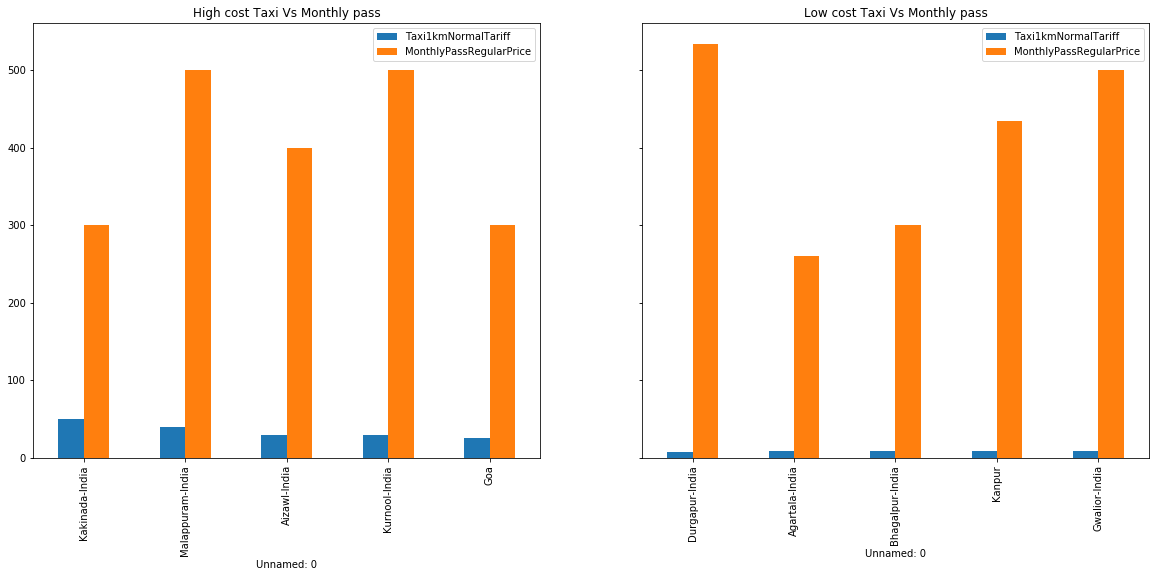

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Taxi Vs Monthly pass")
high_taxiandpass.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Taxi Vs Monthly pass")
low_taxiandpass.head().plot(kind='bar',ax=ax2)
plt.show()

# High cost Monthly pass and Low cost Monthly pass comparing with Taxi 

In [54]:
# high  pass
high_pass = df1.sort_values('MonthlyPassRegularPrice',ascending=False)
print("==========High cost Monthly pass=======")
high_pass.head()

# high pass vs taxi
high_passandtaxi= high_pass[['MonthlyPassRegularPrice','Taxi1kmNormalTariff']]
print("========= Comparing  High cost Monthly pass Vs Taxi ========== ")
high_passandtaxi.head()

# low pass                                   
low_pass = df1.sort_values('MonthlyPassRegularPrice',ascending=True)
print("================== Low cost Monthly pass ===============")
low_pass.head()

#low  pass vs taxi   
low_passandtaxi = low_taxi[['MonthlyPassRegularPrice','Taxi1kmNormalTariff']]
print("================ Comparing Low cost Monthly pass Vs Taxi ===========")
low_passandtaxi.head()

==========High cost Monthly pass=======


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Bangalore,1000.0,150.0,123.79,15.55,35.62,63.67,242.27,163.95,70.37,26.83,...,1764355.95,0.80,419.00,179377.68,2412.48,2759.11,9965.69,25644.93,52923.73,9.53
Bokaro-India,550.0,145.0,100.00,10.78,25.00,64.00,185.00,96.67,60.00,19.00,...,1627000.00,0.85,500.00,96000.00,2128.00,2166.67,3750.00,7500.00,9000.00,9.25
Gurgaon,1000.0,130.0,119.44,14.96,29.30,78.33,265.48,148.48,73.33,22.21,...,1727222.22,0.76,561.90,196538.46,2851.85,3353.12,9910.71,26937.50,74548.73,9.29
Gandhinagar-India,575.0,150.0,100.00,13.31,35.00,66.33,253.33,121.67,55.94,16.67,...,1530166.67,0.90,NaN,94600.00,2000.00,2250.00,5000.00,12166.67,26666.67,9.24
Mathura-Uttar-Pradesh-India,800.0,120.0,120.00,14.75,30.00,64.18,239.17,125.00,58.54,20.83,...,1596200.00,0.76,466.67,139833.33,2776.47,2750.00,6000.00,13333.33,54224.56,9.29


========= Comparing  High cost Monthly pass Vs Taxi ========== 


,MonthlyPassRegularPrice,Taxi1kmNormalTariff
Unnamed: 0,,
Bangalore,1500.0,15.0
Bokaro-India,1250.0,12.0
Gurgaon,1200.0,13.0
Gandhinagar-India,1100.0,12.0
Mathura-Uttar-Pradesh-India,1000.0,13.0


================== Low cost Monthly pass ===============


,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gulbarga-India,700.0,130.0,82.25,14.89,25.00,60.00,200.0,133.33,70.0,24.00,...,1818000.00,0.88,200.00,65000.00,1666.67,1933.33,4000.00,10000.00,NaN,9.93
Nagercoil,400.0,90.0,72.22,13.25,34.82,60.83,190.0,126.57,70.0,31.21,...,1478529.41,0.96,400.00,115833.33,1339.80,2339.09,3250.00,6750.00,NaN,9.09
Mangalore,850.0,200.0,155.71,16.42,26.71,58.67,245.0,138.33,73.0,26.17,...,1557250.00,0.92,466.67,75108.98,2140.00,2699.00,6299.94,14750.00,36634.41,8.45
Bathinda-India,650.0,150.0,85.00,12.22,23.33,69.67,500.0,175.00,80.0,15.00,...,1250000.00,0.63,0.00,55000.00,3000.00,4333.33,3666.67,10666.67,40902.86,11.00
Nasik,700.0,165.0,118.52,12.91,27.50,62.00,212.5,140.00,80.0,23.33,...,1627000.00,0.73,520.00,122500.00,2100.00,2485.00,6000.00,12500.00,NaN,9.28


================ Comparing Low cost Monthly pass Vs Taxi ===========


,MonthlyPassRegularPrice,Taxi1kmNormalTariff
Unnamed: 0,,
Durgapur-India,533.6749,7.5
Agartala-India,260.0000,9.0
Bhagalpur-India,300.0000,9.0
Kanpur,434.7800,9.5
Gwalior-India,500.0000,9.5


Text(0.5, 1.0, 'High cost Monthly pass Vs Taxi')

Text(0.5, 1.0, 'Low cost Monthly pass Vs Taxi')

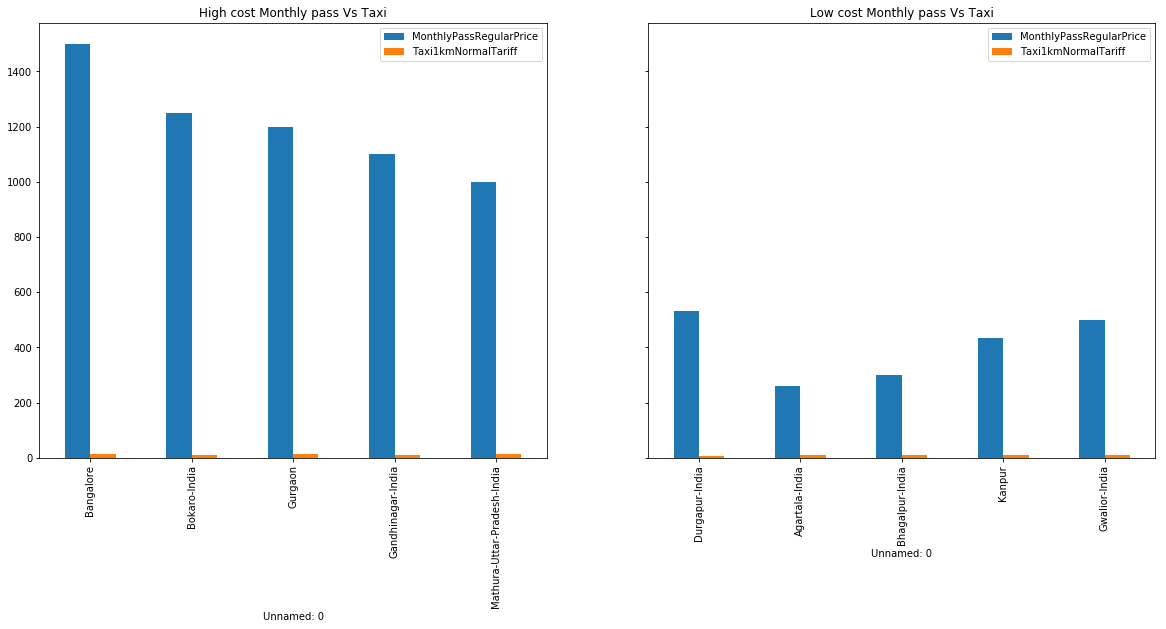

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8), sharey=True)

ax1.set_title("High cost Monthly pass Vs Taxi")
high_passandtaxi.head().plot(kind='bar',ax=ax1)

ax2.set_title("Low cost Monthly pass Vs Taxi")
low_passandtaxi.head().plot(kind='bar',ax=ax2)
plt.show()